<a href="https://colab.research.google.com/github/lavanyaSBeulah/The-Sparks-Foundation/blob/main/TASK4_EDA_TERRORISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP@THE SPARKS FOUNDATION

BATCH :GRIPDEC'20
NAME  :S LAVANYA

TASK -4

Exploratory Data Analysis - Terrorism

(Level - Intermediate)

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!py -m pip install folium

/bin/bash: py: command not found


In [6]:
import folium
from folium.plugins import MarkerCluster

In [7]:
df =pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding ='latin =1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,924.000000,7316.000000,7316.000000,7316.0,7316.000000,18.000000,2.000000,7316.000000,6897.000000,7296.000000,109.000000,84.000000,94.000000,10.000000,7.000000,10.000000,0.0,0.0,0.0,7315.000000,11.000000,0.0,7315.000000,1845.000000,854.000000,...,215.000000,7.000000,6.000000,0.0,0.0,0.0,14.000000,7315.000000,5927.000000,325.000000,295.000000,19.000000,17.000000,3.000000,3.0,6507.000000,1144.000000,1145.000000,5273.000000,1119.000000,1072.000000,7315.000000,3448.000000,2.287000e+03,7190.000000,580.000000,580.000000,211.000000,185.000000,7098.000000,2.300000e+02,1.0,7.200000e+01,0.0,371.000000,280.000000,7315.000000,7315.000000,7315.000000,7315.000000
mean,1.975070e+11,1975.003417,6.523237,15.129579,0.029251,238.453390,5.899125,34.842112,-22.783191,1.139284,0.005467,0.997266,0.987015,0.909650,-1.257654,1.372294,0.064243,0.905686,0.0,3.236195,4.222222,3.000000,6.410197,38.516746,167.188596,9.807339,51.904762,213.202128,3.900000,33.000000,182.600000,NaN,NaN,NaN,0.024197,0.545455,NaN,0.002734,-33.888347,-83.175644,...,4.441860,0.857143,3.333333,NaN,NaN,NaN,0.357143,6.551606,11.912435,6.393846,11.542373,7.157895,11.176471,7.000000,16.0,0.785923,0.166958,0.234061,1.061255,0.388740,0.025187,0.550649,3.243039,1.354194e+05,0.080668,-1.463793,0.186207,-1.468009,35.929730,0.032544,6.014240e+06,20000.0,1.566266e+06,NaN,2.865229,6.428571,-3.135885,-3.064252,0.409706,-1.596719
std,2.676603e+08,2.675243,3.477868,9.053688,0.168521,194.540953,3.290733,22.248928,52.465516,0.700851,0.073745,0.052217,0.113218,0.286702,3.316879,0.639890,0.245202,0.292285,0.0,1.983729,2.462795,1.414214,5.890827,29.433240,77.622528,6.756995,27.205430,66.378449,4.148628,20.116328,58.621574,NaN,NaN,NaN,0.153670,0.522233,NaN,0.052221,50.888233,36.709206,...,2.920299,0.377964,3.265986,NaN,NaN,NaN,0.497245,2.113969,7.022859,1.681038,7.225997,2.544344,9.248211,1.732051,5.0,6.264323,1.079966,2.649593,7.851273,2.541234,0.245063,1.093145,0.469039,1.143578e+06,0.272343,66.295438,4.869256,15.685806,81.055942,0.177453,6.622020e+07,NaN,5.339688e+06,NaN,1.302037,24.729981,4.423057,4.486479,0.662392,4.131260
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,53.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.973041e+11,1973.000000,3.000000,7.000000,0.000000,98.000000,2.000000,33.888523,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.500000,1.000000,15.000000

In [11]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999915,0.045565,-0.027407,-0.021290,-0.229719,0.253971,-0.067495,0.260474,0.074050,0.000130,-0.033278,-0.005739,0.074374,-0.153124,-0.114219,-0.103827,0.087108,NaN,-0.002935,-0.009789,1.0,-0.014451,-0.012530,-0.295920,0.035018,0.031588,-0.066362,-0.184400,-0.006697,-0.052240,NaN,NaN,NaN,-0.105084,-0.134430,NaN,-0.001971,0.530538,0.134746,...,-0.047970,0.956741,1.000000,NaN,NaN,NaN,1.639902e-02,0.040701,-0.150615,-0.110499,0.067106,-0.321536,-0.294573,0.509711,0.011250,0.016795,0.031152,0.072213,0.009193,0.001661,0.096894,0.128108,0.008409,-0.001266,0.027158,0.039686,0.016216,-0.012285,0.093247,0.004613,0.076574,NaN,-0.080264,NaN,0.091293,-0.176293,0.062468,0.059688,-0.113371,0.023213
iyear,0.999915,1.000000,0.032573,-0.028284,-0.021448,-0.230060,0.253480,-0.067212,0.259973,0.073897,-0.000095,-0.033206,-0.005721,0.074370,-0.153084,-0.113953,-0.104118,0.086953,NaN,-0.002342,-0.006075,1.0,-0.014307,-0.012392,-0.295610,0.036920,0.034171,-0.066287,-0.182144,-0.008466,-0.056084,NaN,NaN,NaN,-0.104939,-0.149071,NaN,-0.002014,0.530158,0.134828,...,-0.048766,0.954786,1.000000,NaN,NaN,NaN,-2.528089e-17,0.040847,-0.149986,-0.109579,0.068785,-0.321496,-0.295774,0.500000,0.000000,0.016603,0.030453,0.071677,0.008926,0.001162,0.096771,0.128086,0.008887,-0.001523,0.027132,0.039786,0.016144,-0.009703,0.091371,0.004741,0.077428,NaN,-0.083767,NaN,0.090494,-0.176159,0.061752,0.058993,-0.114092,0.022338
imonth,0.045565,0.032573,1.000000,0.040242,0.010969,0.016156,0.047267,-0.024611,0.047423,0.014348,0.016028,-0.007178,-0.001490,0.003545,-0.008766,-0.028547,0.017326,0.016008,NaN,-0.044230,-0.278096,NaN,-0.012212,-0.011221,-0.036159,-0.146864,-0.204701,-0.002710,-0.146694,0.132069,0.274591,NaN,NaN,NaN,-0.015798,0.602688,NaN,0.001897,0.107617,0.018327,...,0.057708,0.975076,-1.000000,NaN,NaN,NaN,6.929275e-01,-0.007315,-0.055662,-0.072388,-0.115413,0.044059,0.048657,-0.327327,0.188982,0.015473,0.064494,0.057388,0.021926,0.043918,0.026056,0.006559,-0.038026,0.018677,0.003054,-0.007506,0.004456,-0.186774,0.135634,-0.009805,-0.059508,NaN,0.237643,NaN,0.063107,-0.027012,0.057191,0.055475,0.049954,0.067743
iday,-0.027407,-0.028284,0.040242,1.000000,0.008715,0.028581,-0.004636,0.000091,0.003442,-0.002392,0.008562,0.012605,-0.003026,-0.004284,-0.003372,-0.037161,0.032089,-0.021986,NaN,-0.062194,-0.043218,-1.0,0.022705,0.004786,0.005946,-0.129421,-0.054611,-0.102777,-0.524585,-0.339069,-0.523193,NaN,NaN,NaN,-0.002266,-0.375378,NaN,-0.006537,-0.024435,-0.033214,...,0.101330,-0.258199,-0.090351,NaN,NaN,NaN,-5.576317e-01,-0.037222,-0.029442,0.031468,0.029534,0.276913,0.101715,0.725059,0.972263,0.000346,-0.001549,0.024837,-0.006328,-0.014535,0.030582,0.001039,-0.026729,-0.002091,-0.000104,0.043787,0.045730,-0.037872,0.044336,0.003625,0.003381,NaN,0.019929,NaN,0.066707,-0.044613,0.017506,0.016366,0.038677,0.036825
extended,-0.021290,-0.021448,0.010969,0.008715,1.000000,-0.120801,-0.026972,-0.165211,-0.014179,0.109025,-0.001870,-0.021982,0.019910,0.032071,-0.024179,-0.028179,-0.022324,0.053241,NaN,0.208332,0.336473,NaN,-0.041007,-0.035115,-0.029181,0.018958,0.010502,-0.166028,0.177858,0.197284,-0.776792,NaN,NaN,NaN,-0.022057,NaN,NaN,0.021981,0.216539,0.104154,...,0.188444,NaN,NaN,NaN,NaN,

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

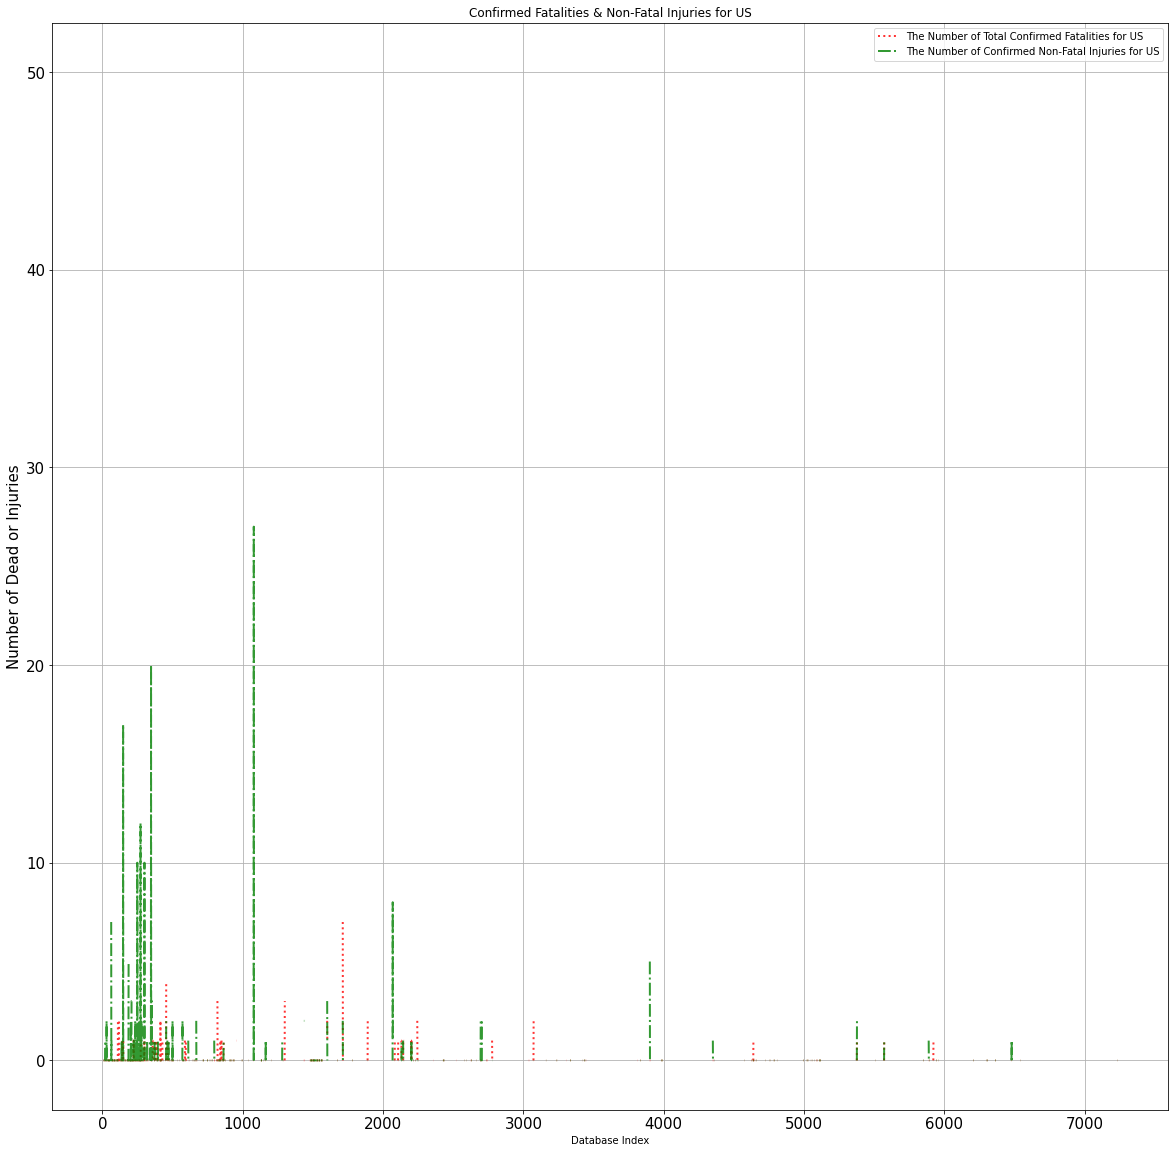

In [13]:
#US TERROR ATTACKS AND DEATH INJURIES
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

Given that the data is sorted by dates, attacks on US citizens seem to be very rare in a given date range. But the terrorist act against the citizens of US has been increasingly in the following year after this rare date range. By finding the date of the start of the increase, the factors in increasing terrorist acts can be easily identified by taking into account the changes and developments in the country after this date.

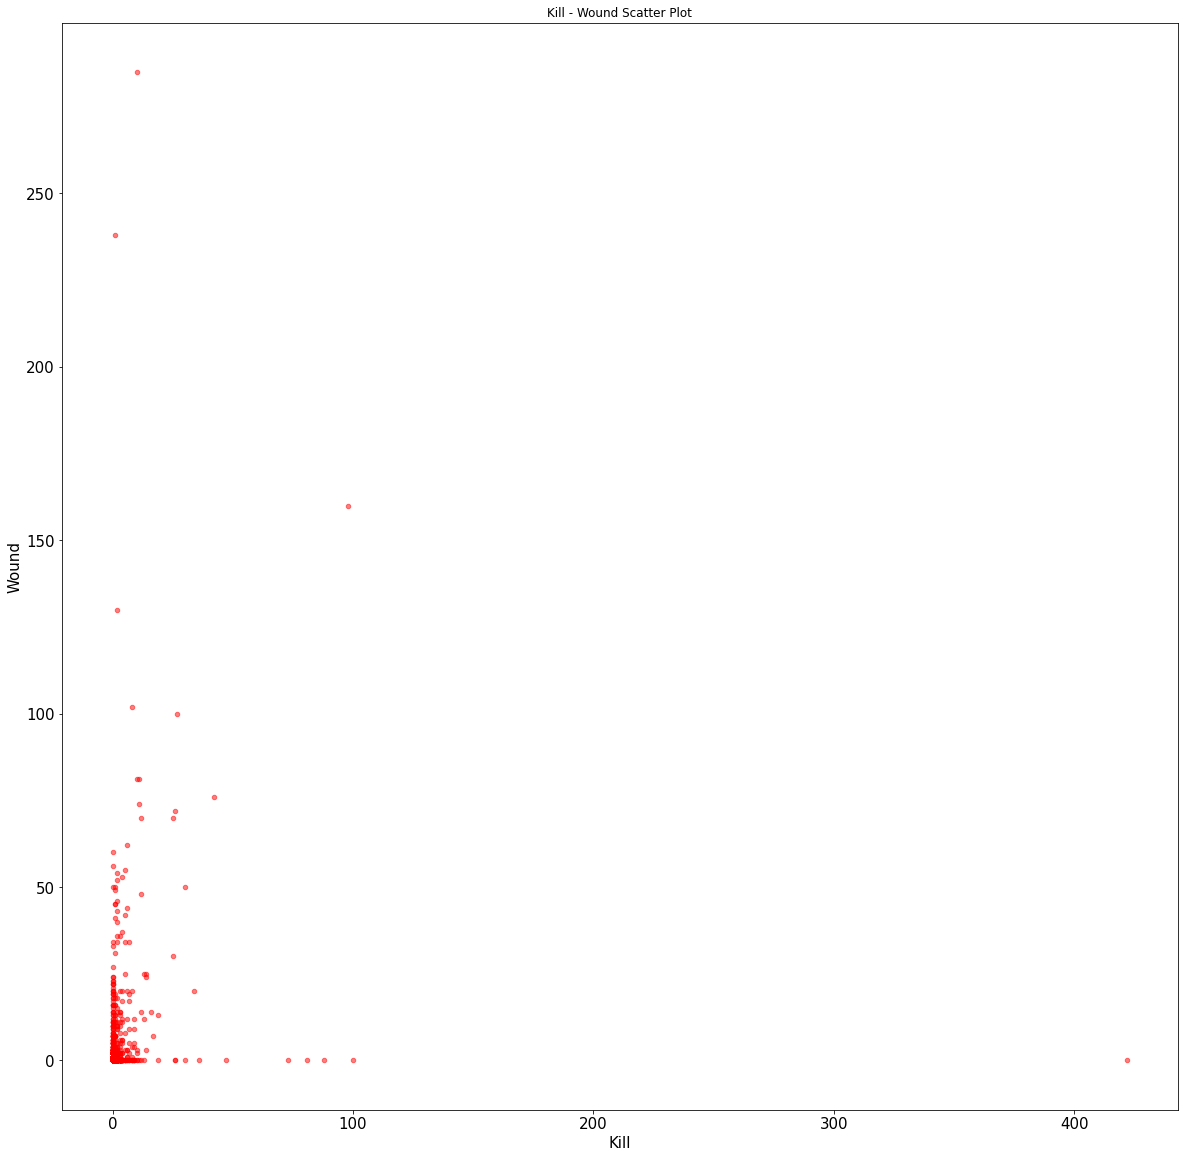

In [14]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.

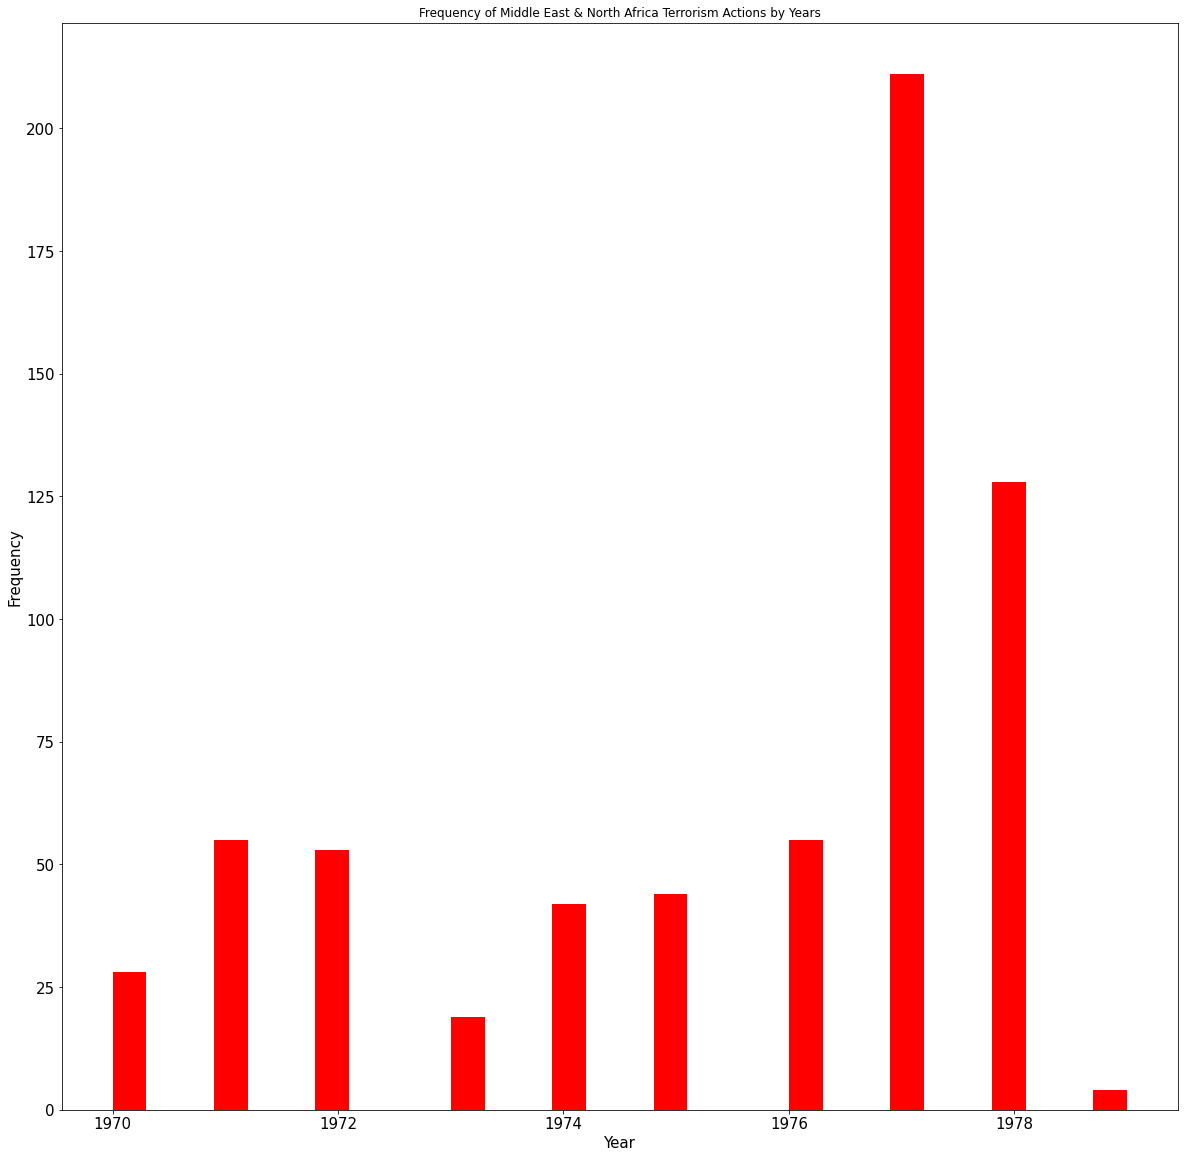

In [16]:
##Frequency of Terrorist Actions in Customized Region
#Let's analyze in Middle East and North Africa

middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

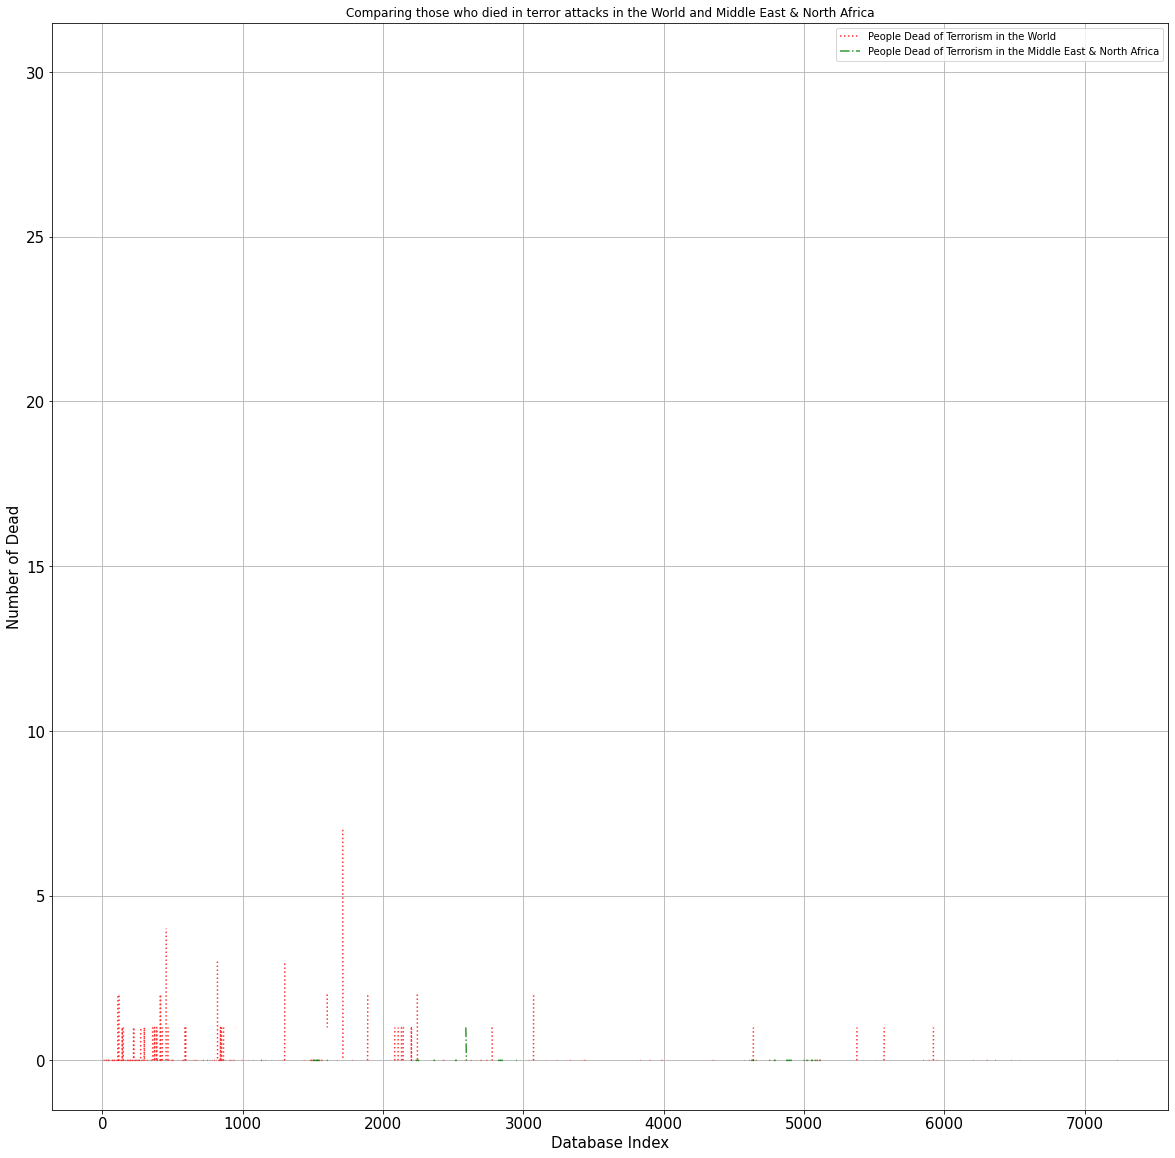

In [17]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

Terrorist Attacks of a Particular year and their Locations.
Let's look at the terrorist acts in the world over a certain year.

In [18]:
filterYear = df['iyear'] == 1970

In [19]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [21]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map



```
84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

Total Number of people killed in terror attack```



In [22]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 5114


Number of people killed by terror attack: 411868


Let's look at what types of attacks these deaths were made of.

---



In [23]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [24]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,1050.0,1484.0,1568.0,454.0,175.0,177.0,113.0,8.0,85.0


In [25]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


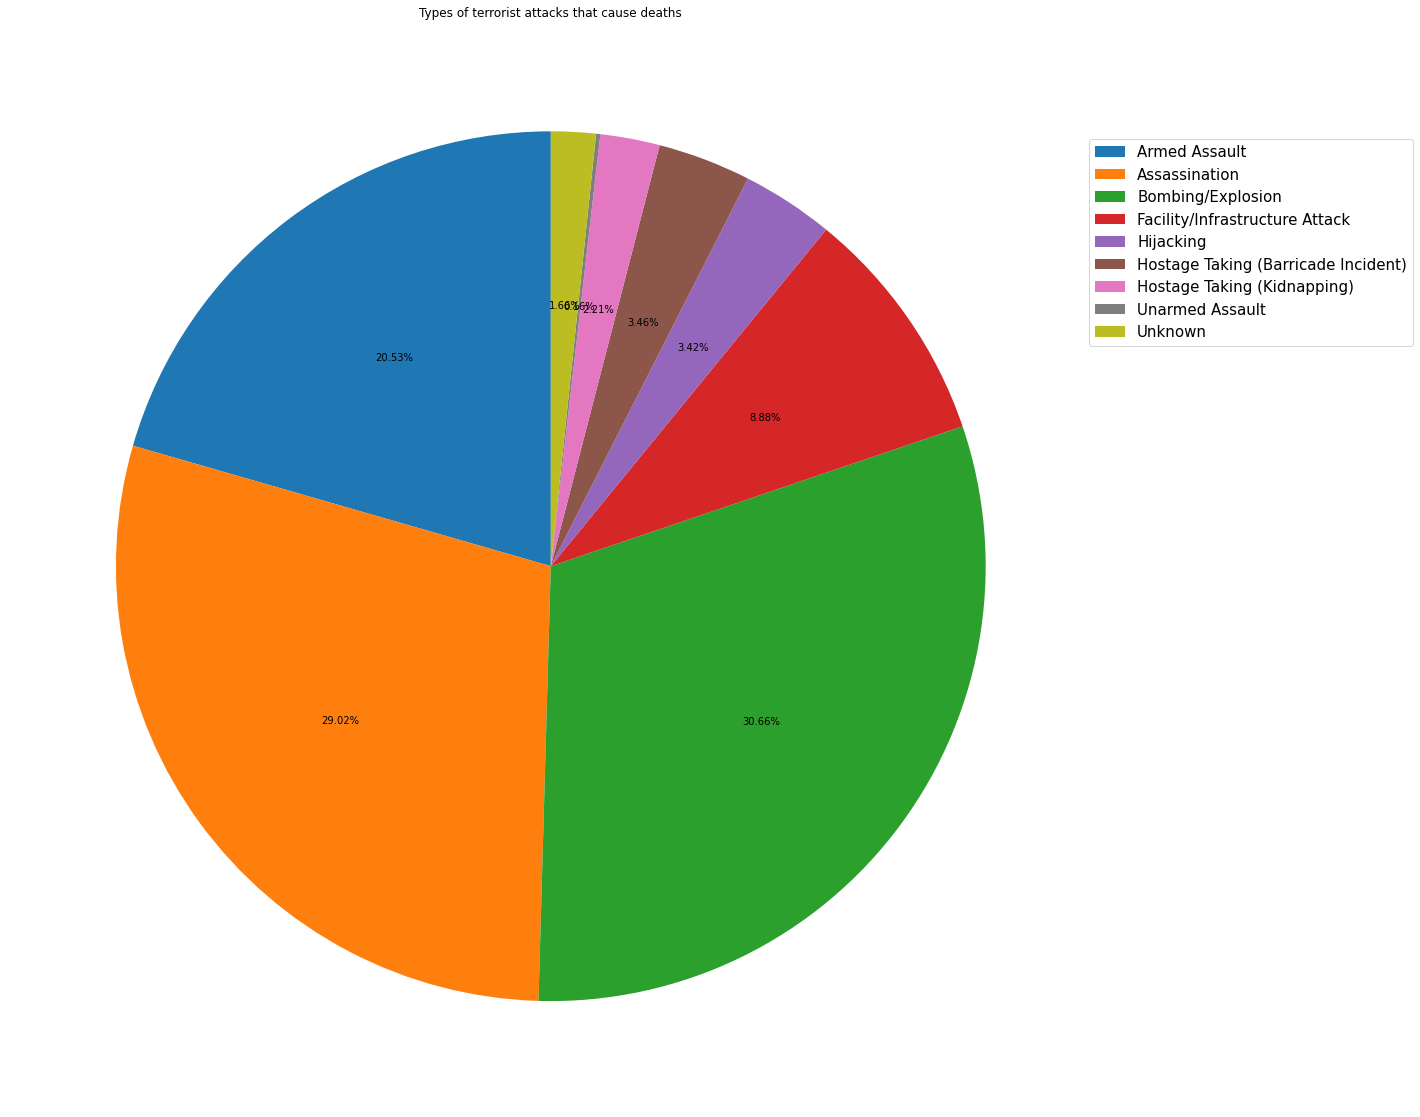

In [26]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Number of Killed in Terrorist Attacks by Countries.¶


In [27]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [28]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,Belgium,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Greece,Guatemala,Guyana,Haiti,Honduras,India,Indonesia,Iran,...,North Yemen,Pakistan,Panama,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Rhodesia,Saudi Arabia,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
nkill,0.0,0.0,0.0,0.0,317.0,3.0,9.0,0.0,0.0,73.0,1.0,0.0,1.0,3.0,0.0,4.0,2.0,0.0,0.0,135.0,0.0,17.0,26.0,0.0,1.0,4.0,1.0,4.0,4.0,42.0,34.0,43.0,115.0,74.0,5.0,0.0,0.0,4.0,1.0,469.0,...,2.0,11.0,0.0,2.0,0.0,0.0,228.0,0.0,3.0,93.0,0.0,0.0,0.0,13.0,1.0,81.0,0.0,4.0,209.0,1.0,3.0,4.0,47.0,7.0,25.0,0.0,32.0,0.0,80.0,7.0,1638.0,164.0,4.0,2.0,9.0,44.0,0.0,2.0,1.0,5.0


In [29]:
countryKillFormatData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 102 entries, Afghanistan to Zambia
dtypes: float64(102)
memory usage: 824.0+ bytes


In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

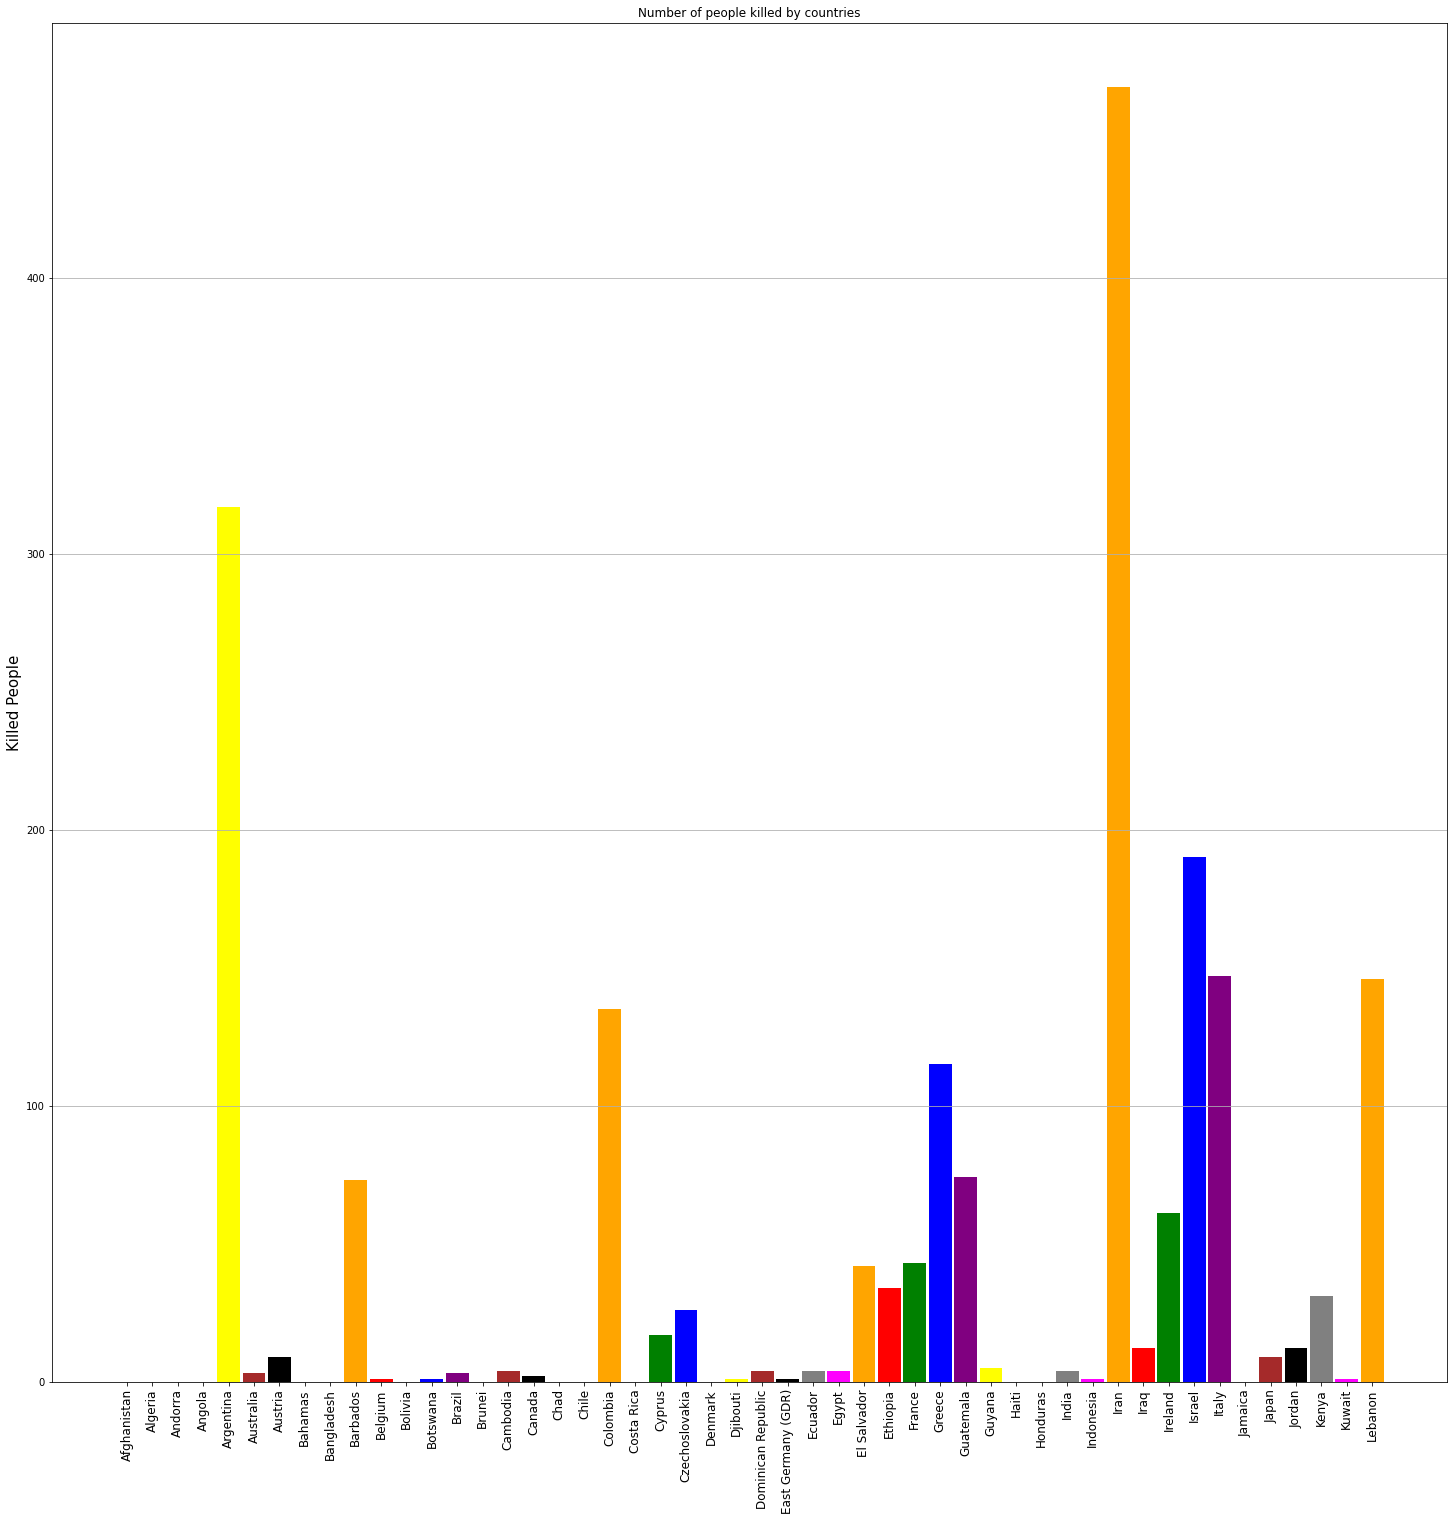

In [31]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

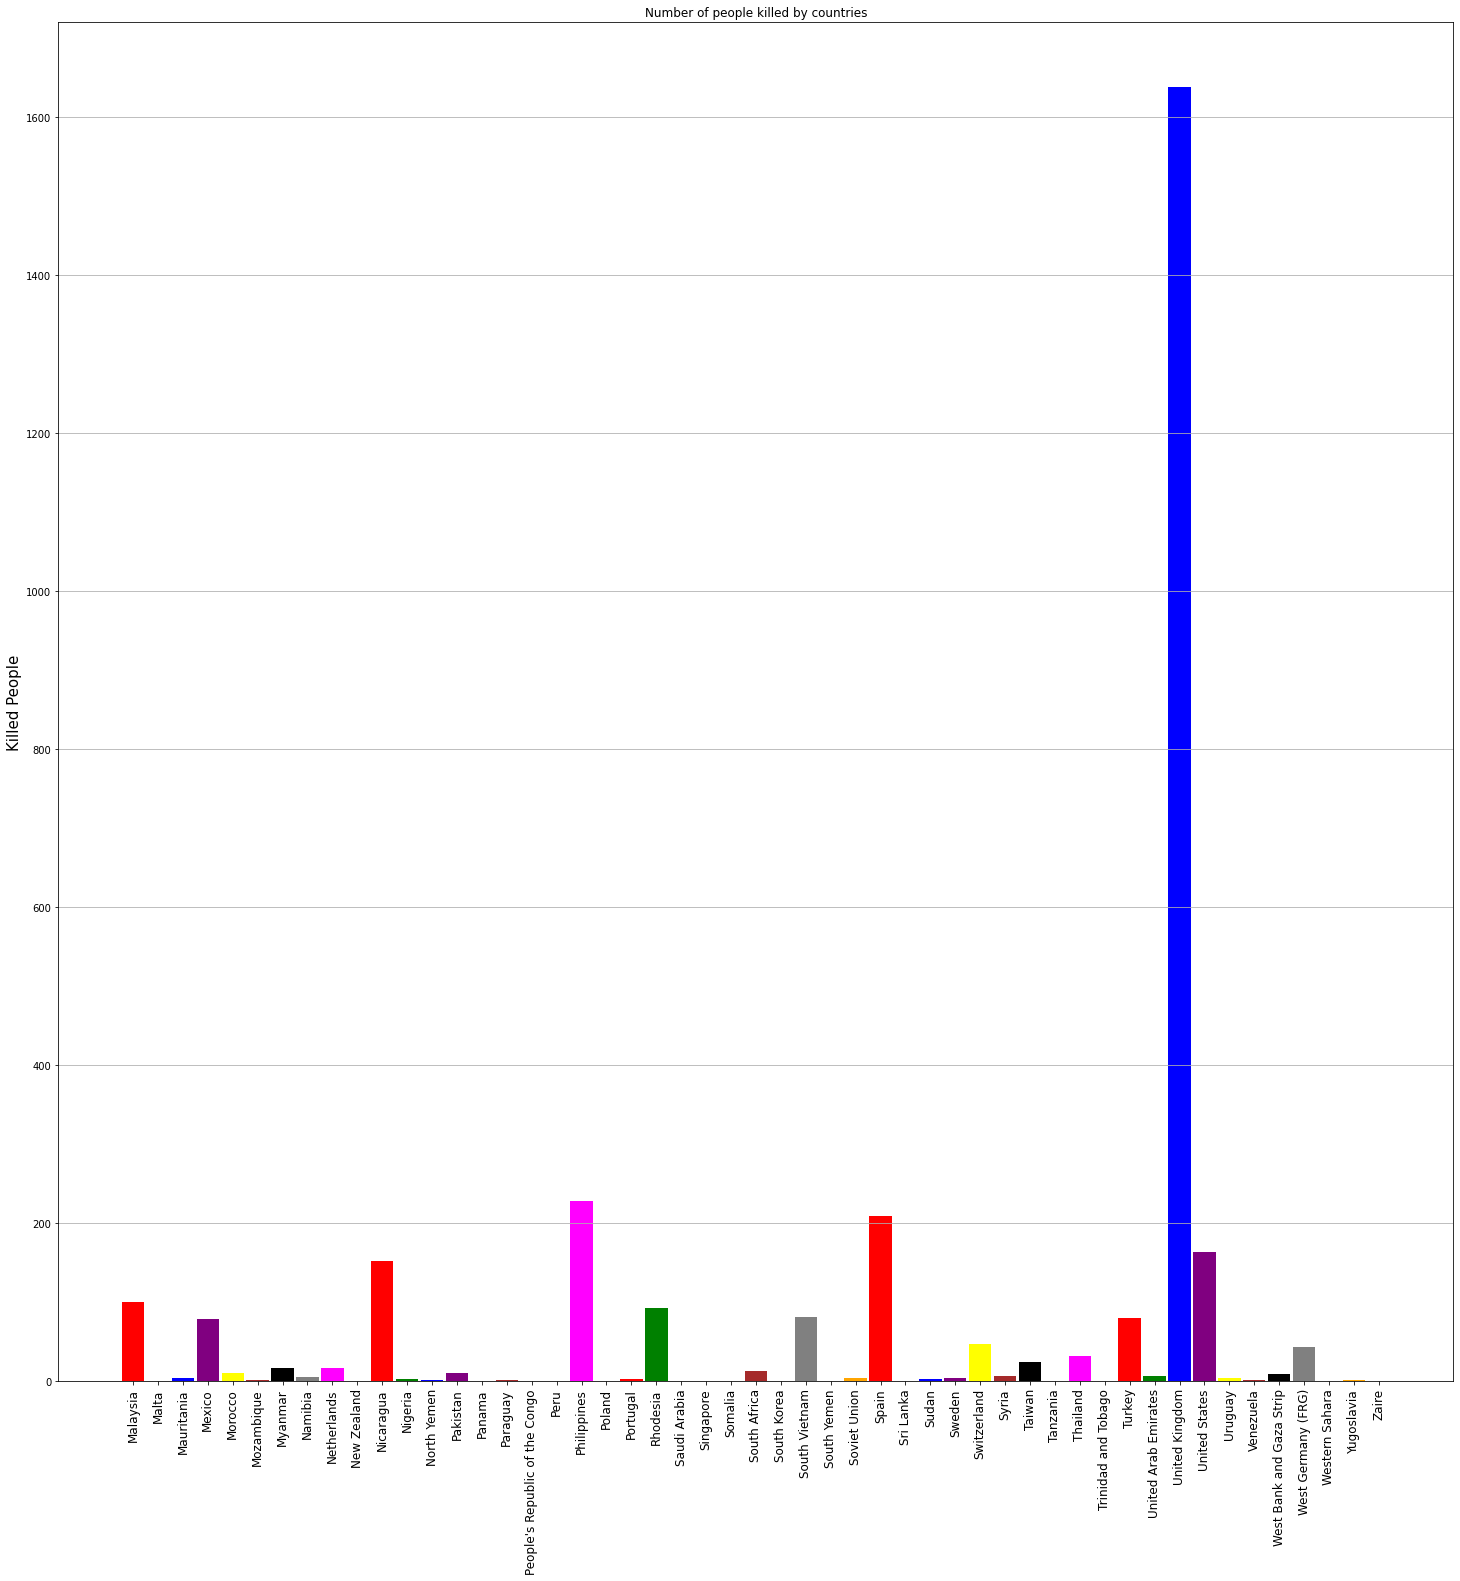

In [32]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.


thank You !